## Observations and Insights 

In [257]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook

In [225]:

#Find the files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Merge datasets
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

mouse_study_df.head()

# Mpouse Study Preview 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [227]:
#Total Number of Mice
Total_Mice = len(mouse_study_df["Mouse ID"].unique())
Total_Mice_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_df

,Number of Mice
0,249


In [228]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Find duplicates 

mouse_study_df[mouse_study_df.duplicated(keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [230]:
mouse_study_clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [231]:
#drop the duplicate mouse

mouse_study_clean_df = mouse_study_df.drop([908,909],axis = 0) 
mouse_study_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [258]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_study["908"]
#est

In [233]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
## This drops the dup but not by id
#mouse_study.drop(["g989"])
#mouse_study_df.drop(["g989"], (axis = 1)
#mouse_study_df.head()
mouse_study_clean_df = mouse_study_df.drop_duplicates()

mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [234]:
Drugs = mouse_study_clean_df["Drug Regimen"].value_counts()

In [235]:
# Checking the number of mice in the clean DataFrame.
#Thisisnt right 
Total_Mice = len(mouse_study_clean_df["Mouse ID"].unique())
Total_Mice_Clean_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_Clean_df

,Number of Mice
0,249


## Summary Statistics

In [236]:
#Drugs by average tumor volume
mouse_study_clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [237]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Summary Stats - long version 
Mean = mouse_study_clean_df.groupby("Drug Regimen").mean()
median = mouse_study_clean_df.groupby("Drug Regimen").median()
varience = mouse_study_clean_df.groupby("Drug Regimen").var()
Std_dev = mouse_study_clean_df.groupby("Drug Regimen").std()
sem = mouse_study_clean_df("Drug Regimen").sem()
Summary_Stats_df = pd.DataFrame({
            "Mean" : mean, 
            "Median": median, 
            "Variance": varience ,
            "Standard Deviation": Std_dev,
            "SEM ": sem
})
Summary_Stats_df


TypeError: 'DataFrame' object is not callable

In [241]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

mouse_study_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" :['Mean','Median', 'Varience', 'Std. Deviation']})

AttributeError: 'SeriesGroupBy' object has no attribute 'Mean'

## Bar and Pie Charts

In [239]:

#Get durg regimens
mouse_study_clean_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     160
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


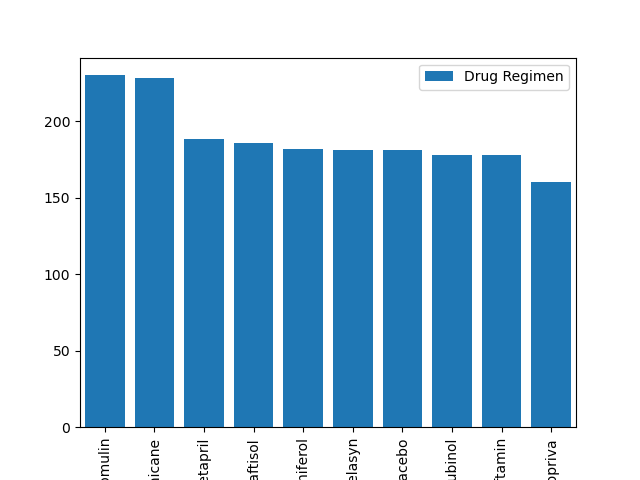

In [195]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# a=b  b is copied in a 
# b =a  a is copied b 

plot_mice_df = pd.DataFrame(mouse_study_clean_df["Drug Regimen"].value_counts()) 
plot_mice_df.plot(kind = "bar")

In [196]:
plot_mice_df(kind = pie)
show.plot()

NameError: name 'pie' is not defined

In [256]:
counts.mean()

189.2

In [197]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#Drug = mouse_study_clean_df ["Drug Regimen"]
#pd.DataFrame(mouse_study_clean_df["Drug"].pyplot.plot()
# data to plot

# create plot
#(x,y)
counts

Male      958
Female    933
Name: Sex, dtype: int64

<IPython.core.display.Javascript object>


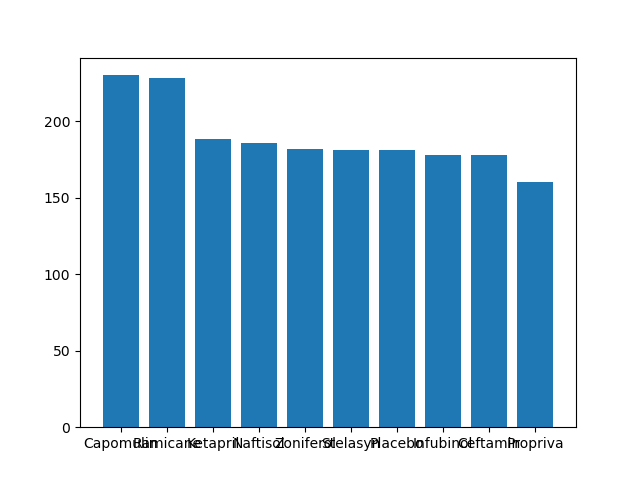

In [251]:
counts = mouse_study_clean_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.show()

<IPython.core.display.Javascript object>


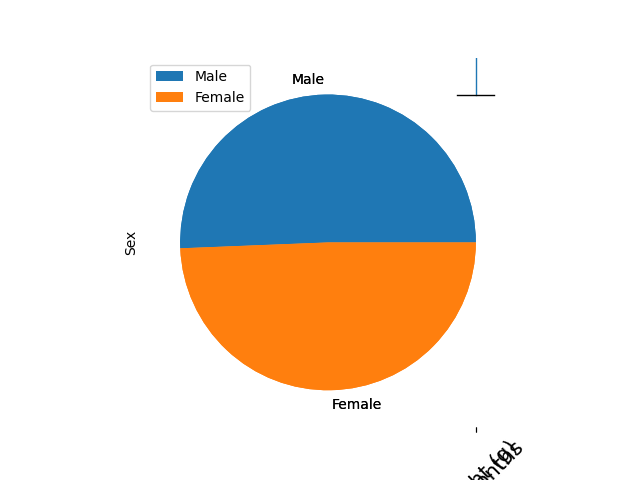

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014CF3976400>],
      dtype=object)

In [199]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_mice_df = pd.DataFrame(mouse_study_clean_df["Sex"].value_counts())
plot_mice_df.plot(kind = "pie", subplots = True)


In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_study_clean_df["Sex"].value_counts()
plt.pie(counts.values,labels=counts.index.values)
plt.show()


## Quartiles, Outliers and Boxplots

In [250]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Drugs.df = mouse_study_clean_df.sort_values(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
Treatments_df = Drugs.groupby(['Drugs'].last()['Tumor Volume (mme)']
Treatments_df
# Start by getting the last (greatest) timepoint for each mouse
#sorted_df = combined_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pd.merge

SyntaxError: invalid syntax (<ipython-input-250-ebdde8e92715>, line 5)

In [213]:
# Put treatments into a list for for loop (and later for plot labels)
# List for loop
sorted_df = Treatments_df(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
last_df.head().reset_index()

# Create empty list to fill with tumor vol data (for plotting)
#Tumor Volume
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

NameError: name 'Treatments_df' is not defined

In [222]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#boxplot of
boxplot = mouse_study_clean_df.boxplot['Tumor Volume (mme)',(grid=False, rot=45, fontsize=15)]
type(boxplot)


SyntaxError: invalid syntax (<ipython-input-222-ca217da27362>, line 3)

## Line and Scatter Plots

In [248]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = mouse_study_clean_df(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

TypeError: 'DataFrame' object is not callable

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
